In [ ]:
import zipfile
import os
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import joblib
import pandas as pd
from sklearn.preprocessing import StandardScaler

In [3]:
# Load the dataset
data_path = 'Financial Risk.zip'
loan_data = pd.read_csv('Loan.csv')

# Check for missing values and data types
print("\nMissing Values in the Dataset:")
print(loan_data.isnull().sum())

# Convert categorical columns to appropriate data types
loan_data['EmploymentStatus'] = loan_data['EmploymentStatus'].astype('category')
loan_data['EducationLevel'] = loan_data['EducationLevel'].astype('category')
loan_data['MaritalStatus'] = loan_data['MaritalStatus'].astype('category')
loan_data['HomeOwnershipStatus'] = loan_data['HomeOwnershipStatus'].astype('category')
loan_data['LoanPurpose'] = loan_data['LoanPurpose'].astype('category')

# Inspect the first few rows
print("\nFirst 5 Rows of Cleaned Data:")
print(loan_data.head())

# Handle missing values (simple imputation or removal)
loan_data.fillna(loan_data.mean(), inplace=True)  # For numerical columns
loan_data.fillna(loan_data.mode().iloc[0], inplace=True)  # For categorical columns

# Verify if there are still missing values
print("\nMissing Values After Imputation:")
print(loan_data.isnull().sum())


Extracted files: ['CSV Generation.py', 'Loan.csv']

First 5 Rows of Loan Data:
  ApplicationDate  Age  AnnualIncome  CreditScore EmploymentStatus  \
0      2018-01-01   45         39948          617         Employed   
1      2018-01-02   38         39709          628         Employed   
2      2018-01-03   47         40724          570         Employed   
3      2018-01-04   58         69084          545         Employed   
4      2018-01-05   37        103264          594         Employed   

  EducationLevel  Experience  LoanAmount  LoanDuration MaritalStatus  ...  \
0         Master          22       13152            48       Married  ...   
1      Associate          15       26045            48        Single  ...   
2       Bachelor          26       17627            36       Married  ...   
3    High School          34       37898            96        Single  ...   
4      Associate          17        9184            36       Married  ...   

   MonthlyIncome UtilityBillsPaymentH


Summary Statistics:
                Age   AnnualIncome   CreditScore    Experience     LoanAmount  \
count  20000.000000   20000.000000  20000.000000  20000.000000   20000.000000   
mean      39.752600   59161.473550    571.612400     17.522750   24882.867800   
std       11.622713   40350.845168     50.997358     11.316836   13427.421217   
min       18.000000   15000.000000    343.000000      0.000000    3674.000000   
25%       32.000000   31679.000000    540.000000      9.000000   15575.000000   
50%       40.000000   48566.000000    578.000000     17.000000   21914.500000   
75%       48.000000   74391.000000    609.000000     25.000000   30835.000000   
max       80.000000  485341.000000    712.000000     61.000000  184732.000000   

       LoanDuration  NumberOfDependents  MonthlyDebtPayments  \
count  20000.000000        20000.000000         20000.000000   
mean      54.057000            1.517300           454.292700   
std       24.664857            1.386325           240.507

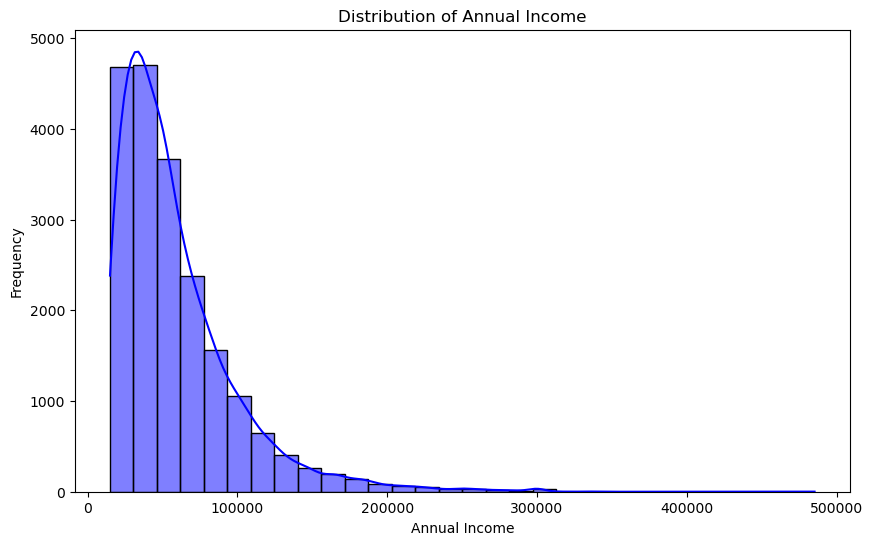

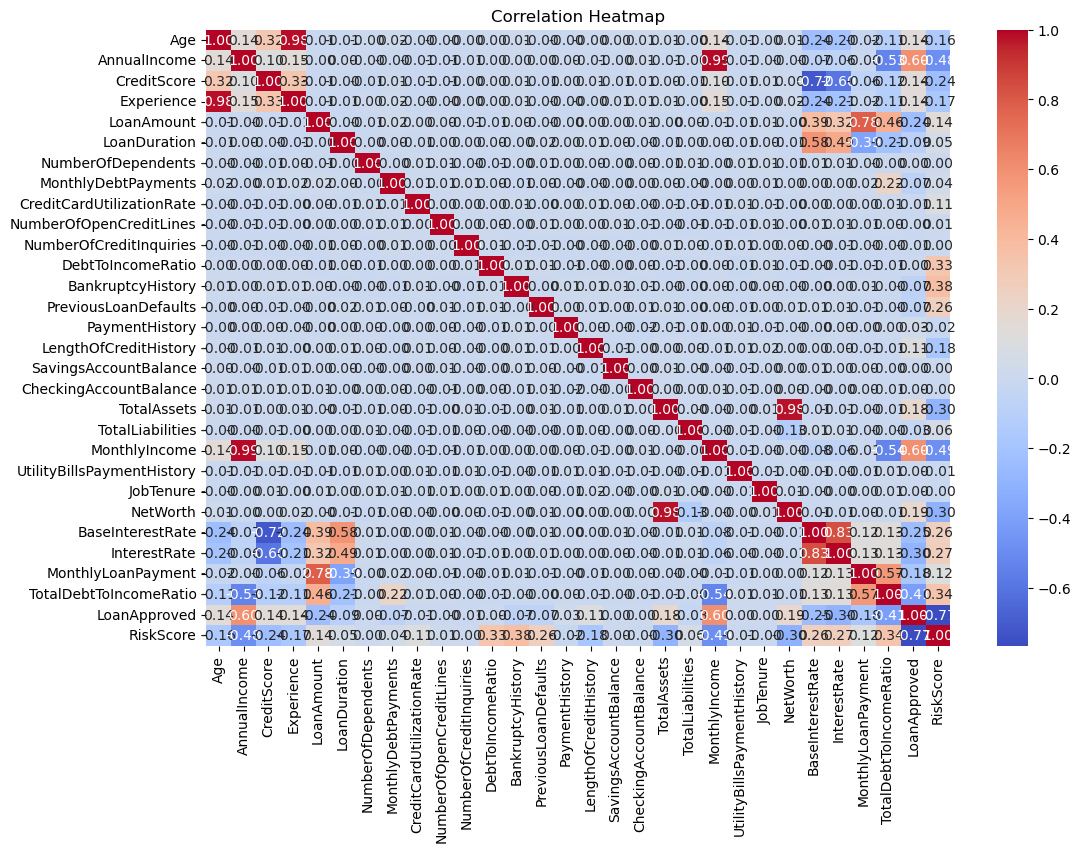

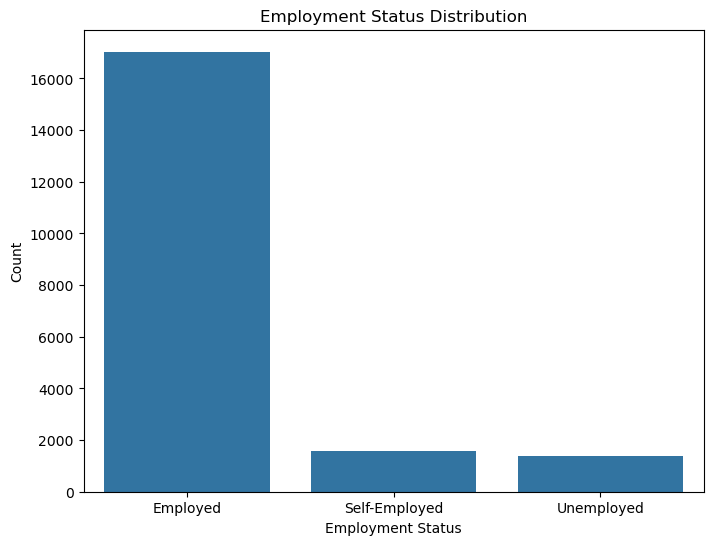

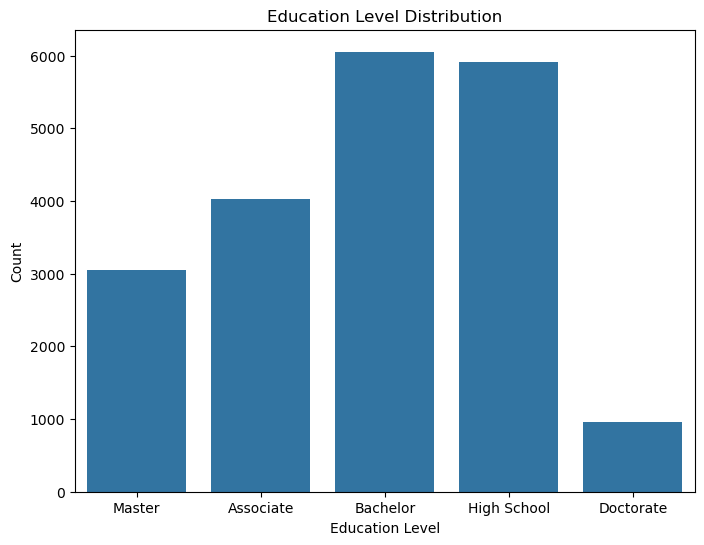

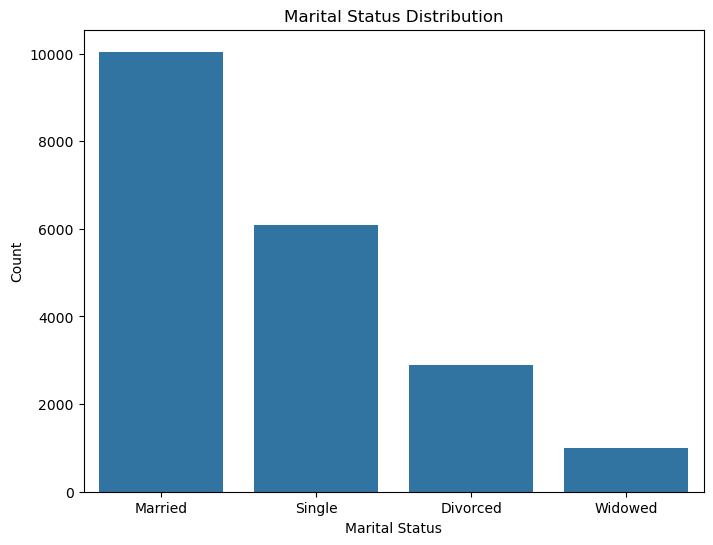


Missing Values in Categorical Columns:
EmploymentStatus    0
EducationLevel      0
MaritalStatus       0
dtype: int64


In [5]:
# Exploratory Data Analysis (EDA)

# Summary statistics
print("\nSummary Statistics:")
print(loan_data.describe())

# Visualize distributions of key variables
plt.figure(figsize=(10, 6))
sns.histplot(loan_data['AnnualIncome'], kde=True, bins=30, color='blue')
plt.title('Distribution of Annual Income')
plt.xlabel('Annual Income')
plt.ylabel('Frequency')
plt.show()

# Drop non-numeric columns for correlation calculation
numeric_data = loan_data.select_dtypes(include=['float64', 'int64'])

# Correlation heatmap for numerical features
corr = numeric_data.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

# Visualizing categorical variables
# Employment Status
plt.figure(figsize=(8, 6))
sns.countplot(x='EmploymentStatus', data=loan_data)
plt.title('Employment Status Distribution')
plt.xlabel('Employment Status')
plt.ylabel('Count')
plt.show()

# Education Level
plt.figure(figsize=(8, 6))
sns.countplot(x='EducationLevel', data=loan_data)
plt.title('Education Level Distribution')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.show()

# Marital Status
plt.figure(figsize=(8, 6))
sns.countplot(x='MaritalStatus', data=loan_data)
plt.title('Marital Status Distribution')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.show()

# Check for missing values in categorical columns
print("\nMissing Values in Categorical Columns:")
print(loan_data[['EmploymentStatus', 'EducationLevel', 'MaritalStatus']].isnull().sum())

In [6]:
# Feature Engineering

# Create new features based on existing data
loan_data['DebtToIncomeRatio'] = loan_data['MonthlyDebtPayments'] / loan_data['AnnualIncome']
loan_data['NetWorth'] = loan_data['TotalAssets'] - loan_data['TotalLiabilities']

# Check for NaN or infinite values in the new features
loan_data['DebtToIncomeRatio'] = loan_data['DebtToIncomeRatio'].replace([float('inf'), -float('inf')], pd.NA)
loan_data['NetWorth'] = loan_data['NetWorth'].replace([float('inf'), -float('inf')], pd.NA)

# Drop rows with NaN values
loan_data.dropna(subset=['DebtToIncomeRatio', 'NetWorth'], inplace=True)

# One-hot encoding for categorical features
loan_data = pd.get_dummies(loan_data, drop_first=True)

# Scaling numerical features
scaler = StandardScaler()
scaled_columns = ['AnnualIncome', 'LoanAmount', 'MonthlyDebtPayments', 'DebtToIncomeRatio', 'NetWorth']
loan_data[scaled_columns] = scaler.fit_transform(loan_data[scaled_columns])

# Inspect feature-engineered data
print("\nFeature-Engineered Data (First 5 Rows):")
print(loan_data.head())


Feature-Engineered Data (First 5 Rows):
   Age  AnnualIncome  CreditScore  Experience  LoanAmount  LoanDuration  \
0   45     -0.476172          617          22   -0.873672            48   
1   38     -0.482095          628          15    0.086551            48   
2   47     -0.456940          570          26   -0.540390            36   
3   58      0.245912          545          34    0.969319            96   
4   37      1.093004          594          17   -1.169194            36   

   NumberOfDependents  MonthlyDebtPayments  CreditCardUtilizationRate  \
0                   2            -1.128029                   0.354418   
1                   1             0.173418                   0.087827   
2                   2             1.861556                   0.137414   
3                   1             1.250334                   0.267587   
4                   1            -0.749653                   0.320535   

   NumberOfOpenCreditLines  ...  MaritalStatus_Married  MaritalStatus

In [7]:
# Model Development and Evaluation

# Define features (X) and target (y)
X = loan_data.drop(['LoanApproved', 'RiskScore'], axis=1)  # Drop target columns
y = loan_data['LoanApproved']  # Binary classification target

# Train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model training using Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Model evaluation
from sklearn.metrics import classification_report, roc_auc_score
y_pred = rf_model.predict(X_test)
y_pred_proba = rf_model.predict_proba(X_test)[:, 1]

# Print evaluation metrics
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print(f"ROC-AUC Score: {roc_auc_score(y_test, y_pred_proba):.4f}")


Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.98      0.94      2983
           1       0.93      0.65      0.77      1017

    accuracy                           0.90      4000
   macro avg       0.91      0.82      0.85      4000
weighted avg       0.90      0.90      0.89      4000

ROC-AUC Score: 0.9699


In [10]:
# Risk Assessment and Loan Approval

# Predict the Risk Score for each applicant (regression task)
loan_data['PredictedRiskScore'] = rf_model.predict_proba(X)[:, 1]

# Implement a decision rule based on the predicted probability (e.g., approve loan if RiskScore > 0.7)
threshold = 0.7
loan_data['PredictedLoanApproval'] = np.where(loan_data['PredictedRiskScore'] > threshold, 1, 0)

# Show predicted loan approvals
print("\nPredicted Loan Approvals (First 5 Rows):")
# If ApplicationDate column is missing, drop it for now
print(loan_data[['PredictedRiskScore', 'PredictedLoanApproval']].head())



Predicted Loan Approvals (First 5 Rows):
   PredictedRiskScore  PredictedLoanApproval
0                0.45                      0
1                0.02                      0
2                0.02                      0
3                0.02                      0
4                0.98                      1


In [11]:
# Model Saving (Optional for Deployment)

# Save the trained model for later use
joblib.dump(rf_model, 'loan_risk_model.pkl')

# To load the model later:
# loaded_model = joblib.load('loan_risk_model.pkl')

['loan_risk_model.pkl']